# Отбор на кафедру КИС Веприков Андрей Б05-003 Машинное обучение

**Задача № 221**

В данной задаче нужно разработать скрипт, который будет с адекватным качеством проверять факт наличия облаков на фотографии неба (качество может быть ограничено лимитированным временем)

## Загрузка и подготовка датасета

Загрузим датасет с сайта Keggle, вот ссылка на него: https://www.kaggle.com/datasets/ashoksrinivas/cloud-anomaly-detection-images

В этом датасете фотографии земли со спутников, 100 из них с облаками, и 140 без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import os
from sklearn import utils
from sklearn.model_selection import train_test_split

In [2]:
# Датасет в Colaboratory нужно загружать из своего гугл диска
from google.colab import drive
drive.mount('/gdrive' )

Mounted at /gdrive


In [3]:
# пути к расположению фотографий с облаками(cloud) и без облаков(noncloud)
path_to_cloud = u'/gdrive/My Drive/data/cloud'
path_to_noncloud = u'/gdrive/My Drive/data/noncloud'

In [4]:
# функция которая преобразует картинку из rgb в один цвет
def rgb2gray(rgb): 
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2] 
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b 
    return gray

Так как в нашем датасете очень мало данных, то создадим еще один, в который будем будем еще помещать повернутые на 90, 180 и 270 градусов фотографии, и проверим, на каких данных наши модели работают лучше

In [5]:
# загрузим наши картинки с облаками
cloud = []
cloud1 = []
for filename in os.listdir(path_to_cloud):
    with cbook.get_sample_data(os.path.join(path_to_cloud, filename)) as image_file:
        image = plt.imread(image_file)
    
    cloud.append(rgb2gray(image))
    cloud1.append(rgb2gray(image))
    cloud1.append(np.rot90(rgb2gray(image)))
    cloud1.append(np.rot90(rgb2gray(image), 2))
    cloud1.append(np.rot90(rgb2gray(image), 3))

cloud = np.array(cloud)
cloud1 = np.array(cloud1)

In [6]:
# загрузим наши картинки без облаков
noncloud = []
noncloud1 = []
for filename in os.listdir(path_to_noncloud):
    with cbook.get_sample_data(os.path.join(path_to_noncloud, filename)) as image_file:
        image = plt.imread(image_file)
    noncloud.append(rgb2gray(image))
    noncloud1.append(rgb2gray(image))
    noncloud1.append(np.rot90(rgb2gray(image)))
    noncloud1.append(np.rot90(rgb2gray(image), 2))
    noncloud1.append(np.rot90(rgb2gray(image), 3))

noncloud = np.array(noncloud)
noncloud1 = np.array(noncloud1)

наглядно покажем, как выглядят наши фотографии

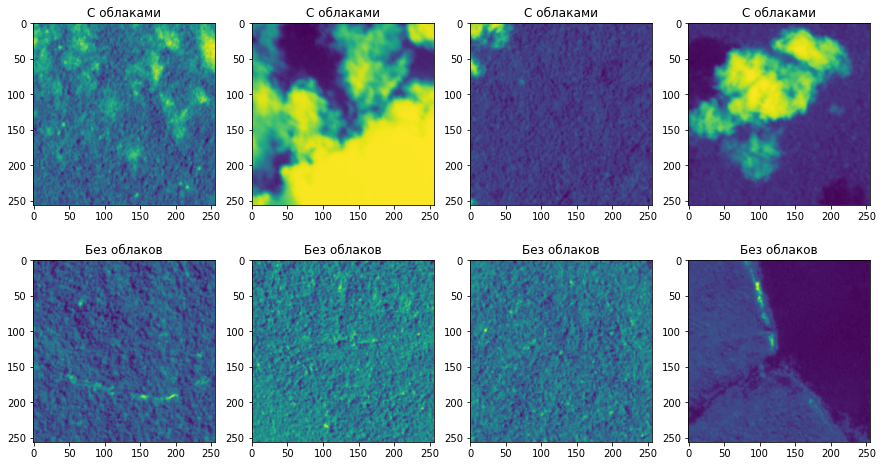

In [81]:
# массив без перевернутых
fig, ax = plt.subplots(2, 4, figsize = (15, 8))

for i in range(4):
  ax[0][i].imshow(cloud[i])
  ax[0][i].set_title(u'С облаками')

for i in range(4):
  ax[1][i].imshow(noncloud[i])
  ax[1][i].set_title(u'Без облаков')

plt.show()

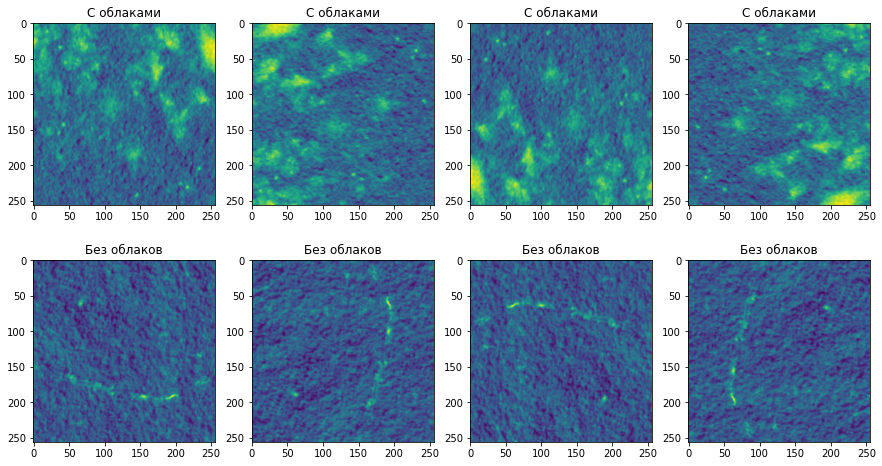

In [83]:
# массив с перевернутыми

fig, ax = plt.subplots(2, 4, figsize = (15, 8))

for i in range(4):
  ax[0][i].imshow(cloud1[i])
  ax[0][i].set_title(u'С облаками')
for i in range(4):
  ax[1][i].imshow(noncloud1[i])
  ax[1][i].set_title(u'Без облаков')

plt.show()

In [17]:
# объединим фотографии с облаками и без облаков в один датасет
data = np.vstack((cloud, noncloud))
labels = np.array([1]*cloud.shape[0] + [0] * noncloud.shape[0])
data = np.reshape(data, [data.shape[0], data.shape[1] * data.shape[2]])

print(data.shape)
print(labels.shape)

(240, 65536)
(240,)


In [18]:
data1 = np.vstack((cloud1, noncloud1))
labels1 = np.array([1]*cloud1.shape[0] + [0] * noncloud1.shape[0])
data1 = np.reshape(data1, [data1.shape[0], data1.shape[1] * data1.shape[2]])

print(data1.shape)
print(labels1.shape)

(960, 65536)
(960,)


In [19]:
# перемешаем наши данные
data, labels = utils.shuffle(data, labels)
data1, labels1 = utils.shuffle(data1, labels1)
print(labels[:10])
print(labels1[:10])

[0 0 1 1 0 1 0 0 1 0]
[0 0 0 1 1 0 0 0 1 0]


Обучим несколько моделей на наших датасетах, все данные внесем в словари accurasity и accurasity1

In [51]:
accuracy = dict()
accuracy1 = dict()

## Линейная классификация

**RidgeClassifier**

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [52]:
ridge_classifier = linear_model.RidgeClassifier()
ridge_classifier1 = linear_model.RidgeClassifier()

accuracy['ridge_classifier'] = cross_val_score(ridge_classifier, X = data, y = labels, 
                      scoring = 'accuracy', cv = 3).mean()
accuracy1['ridge_classifier'] = cross_val_score(ridge_classifier1, X = data1, y = labels1, 
                      scoring = 'accuracy', cv = 3).mean()

print('Без поворотов:', accuracy['ridge_classifier'])
print('С поворотами:', accuracy1['ridge_classifier'])

Без поворотов: 0.6333333333333333
С поворотами: 0.6447916666666668


## Модель RandomForestClassifier

In [25]:
from sklearn import ensemble, metrics 
from sklearn.model_selection import learning_curve

**Неглубокие деревья**

In [53]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
rf_classifier_low_depth1 = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

accuracy['rf_classifier_low_depth'] = cross_val_score(rf_classifier_low_depth, X = data, y = labels, 
                      scoring = 'accuracy', cv = 3).mean()
accuracy1['rf_classifier_low_depth'] = cross_val_score(rf_classifier_low_depth1, X = data1, y = labels1, 
                      scoring = 'accuracy', cv = 3).mean()

print('Без поворотов:', accuracy['rf_classifier_low_depth'])
print('С поворотами:', accuracy1['rf_classifier_low_depth'])

Без поворотов: 0.6375
С поворотами: 0.6802083333333333


**Глубокие деревья**

In [54]:
rf_classifier_big_deth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
rf_classifier_big_deth1 = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)


accuracy['rf_classifier_big_deth'] = cross_val_score(rf_classifier_big_deth, X = data, y = labels, 
                      scoring = 'accuracy', cv = 3).mean()
accuracy1['rf_classifier_big_deth'] = cross_val_score(rf_classifier_big_deth1, X = data1, y = labels1, 
                      scoring = 'accuracy', cv = 3).mean()

print('Без поворотов:', accuracy['rf_classifier_big_deth'])
print('С поворотами:', accuracy1['rf_classifier_big_deth'])

Без поворотов: 0.6583333333333333
С поворотами: 0.7416666666666666


## Модель сверточной нейронной сети

Ради этой модели я и писал в colaboratory, потому что у меня в юпитере почему-то не работает tensorflow

Будем пользоваться надстройкой над tensorflow под наванием keras

In [34]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [35]:
import tensorflow as tf

In [55]:
# объявление параметров модели
batch_size = 128
num_classes = 2
epochs = 2

In [59]:
# выделим тестовую и тренировочную выборки в соотношении 6/1:
data_train, data_test = train_test_split(data, random_state=42, test_size=0.15)
labels_train, labels_test = train_test_split(labels, random_state=42, test_size=0.15)

data_train = data_train.astype('float32')
data_test = data_test.astype('float32')

labels_train = tf.keras.utils.to_categorical(labels_train, num_classes)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes)

print(data_train.shape, data_test.shape)

(204, 65536) (36, 65536)


In [61]:
data_train1, data_test1 = train_test_split(data1, random_state=42, test_size=0.15)
labels_train1, labels_test1 = train_test_split(labels1, random_state=42, test_size=0.15)

data_train1 = data_train1.astype('float32')
data_test1 = data_test1.astype('float32')

labels_train1 = tf.keras.utils.to_categorical(labels_train1, num_classes)
labels_test1 = tf.keras.utils.to_categorical(labels_test1, num_classes)

print(data_train1.shape, data_test1.shape)

(816, 65536) (144, 65536)


In [62]:
# создание самой модели
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(data.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(data1.shape[1],)))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [63]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

_ = model.fit(
    data_train, labels_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(data_test, labels_test)
)

Train on 204 samples, validate on 36 samples
Epoch 1/2
204/204 [==============================] - 1s 5ms/sample - loss: 7030.9366 - acc: 0.5049 - val_loss: 4137.9541 - val_acc: 0.5278
Epoch 2/2
204/204 [==============================] - 1s 4ms/sample - loss: 4497.7045 - acc: 0.4314 - val_loss: 1102.9584 - val_acc: 0.5278


In [64]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

_ = model1.fit(
    data_train1, labels_train1,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(data_test1, labels_test1)
)

Train on 816 samples, validate on 144 samples
Epoch 1/2
816/816 [==============================] - 3s 4ms/sample - loss: 7193.8935 - acc: 0.5025 - val_loss: 3092.6003 - val_acc: 0.4583
Epoch 2/2
816/816 [==============================] - 3s 4ms/sample - loss: 1828.4824 - acc: 0.4841 - val_loss: 409.7107 - val_acc: 0.5417


In [65]:
accuracy['keras'] = model.evaluate(data_test, labels_test, verbose=0)[1]
accuracy1['keras'] = model1.evaluate(data_test1, labels_test1, verbose=0)[1]

print('Без поворотов:', accuracy['keras'])
print('С поворотами:', accuracy1['keras'])

Без поворотов: 0.5277778
С поворотами: 0.5416667


К моему большому сожелению, нейронная сеть показала себя хуже всех, мне кажется это произошло из-за того, что в нашем датасете было очень мало данных (меьше 1000), а для успешной работы нейронной сети нужно порядка 10000 данных.

## Выводы

Посмотрим на качество наших моделей на датасете без поворотов и с поворотами:

In [71]:
print('Без поворотов:')
print(accuracy)
print('С поворотами:')
print(accuracy1)

Без поворотов:
{'ridge_classifier': 0.6333333333333333, 'rf_classifier_low_depth': 0.6375, 'rf_classifier_big_deth': 0.6583333333333333, 'keras': 0.5277778}
С поворотами:
{'ridge_classifier': 0.6447916666666668, 'rf_classifier_low_depth': 0.6802083333333333, 'rf_classifier_big_deth': 0.7416666666666666, 'keras': 0.5416667}


Как мы видим, лучшей моделью стала RandomForestClassifier с использовнием глубоких деревьев, причём во всех случаях модели показывали себя лучше на датасете с поворотами, далее будем использовать только его

Рассмотрим модель RandomForestClassifier с использовнием глубоких деревьев поближе. Будем менять глубину и смотреть на качество метрики

In [85]:
%%time
acc = []
for mx_depth in range(10, 23, 3):
  rf_classifier_big_deth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = mx_depth, random_state = 1)

  a = cross_val_score(rf_classifier_big_deth, X = data1, y = labels1, 
                      scoring = 'accuracy', cv = 3).mean()

  acc.append(a)

  print('max_deth:', mx_depth, 'accuracy:', a)

max_deth: 10 accuracy: 0.7416666666666666
max_deth: 13 accuracy: 0.7458333333333332
max_deth: 16 accuracy: 0.74375
max_deth: 19 accuracy: 0.7447916666666666
max_deth: 22 accuracy: 0.7479166666666667
CPU times: user 1min 29s, sys: 436 ms, total: 1min 30s
Wall time: 1min 29s


Как мы видим, оптимальная глубина - это 13 (дальше уже не особое улучшение в качестве, но большой рост по времени)

Теперь попробуем поменять кол-во деревьев

In [86]:
acc = []
for n_est in range(50, 150, 30):
  rf_classifier_big_deth = ensemble.RandomForestClassifier(n_estimators = n_est, max_depth = 13, random_state = 1)

  a = cross_val_score(rf_classifier_big_deth, X = data1, y = labels1, 
                      scoring = 'accuracy', cv = 3).mean()

  acc.append(a)

  print('n_estimators:', n_est, 'accuracy:', a)

n_estimators: 50 accuracy: 0.7458333333333332
n_estimators: 80 accuracy: 0.7552083333333334
n_estimators: 110 accuracy: 0.75
n_estimators: 140 accuracy: 0.7541666666666668


Мне удалось получить точность примерно 75.5% при значениях параметров: n_estimators = 80, max_depth = 13 в модели RandomForestClassifier